In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [12]:
df['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [13]:
df['Evaporation'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [14]:
df['Sunshine'].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [15]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [17]:
df['WindGustSpeed'].value_counts()

39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

In [18]:
df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [19]:
df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [20]:
df['WindSpeed9am'].value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [21]:
df['WindSpeed3pm'].value_counts()

9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

In [22]:
df['Humidity9am'].value_counts()

73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

In [23]:
df['Humidity3pm'].value_counts()

55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

In [24]:
df['Pressure9am'].value_counts()

1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: Pressure9am, Length: 384, dtype: int64

In [25]:
df['Pressure3pm'].value_counts()

1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64

In [26]:
df['Cloud9am'].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [27]:
df['Cloud3pm'].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

In [28]:
df['Temp9am'].value_counts()

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64

In [29]:
df['Temp3pm'].value_counts()

19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64

In [30]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [31]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

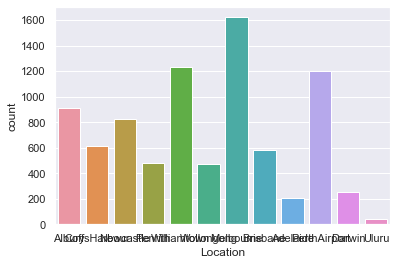

In [33]:
sns.set()
sns.countplot('Location',data=df);

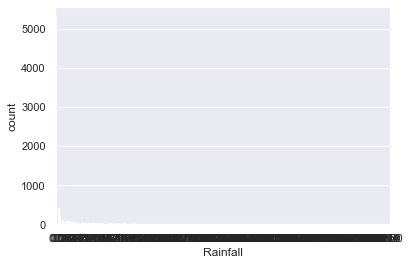

In [34]:
sns.countplot('Rainfall',data=df);

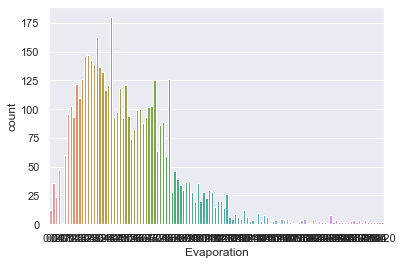

In [35]:
sns.countplot('Evaporation',data=df);

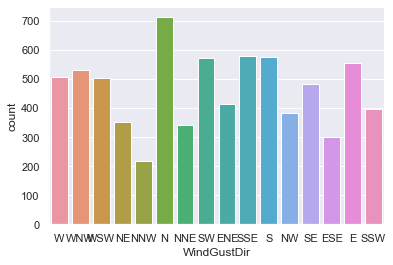

In [36]:
sns.countplot('WindGustDir',data=df);

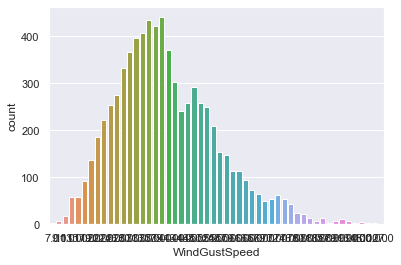

In [37]:
sns.countplot('WindGustSpeed',data=df);

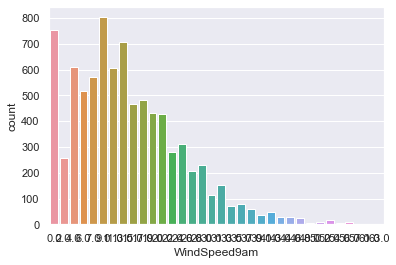

In [39]:
sns.countplot('WindSpeed9am',data=df);

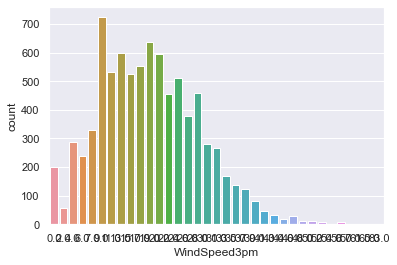

In [40]:
sns.countplot('WindSpeed3pm',data=df);

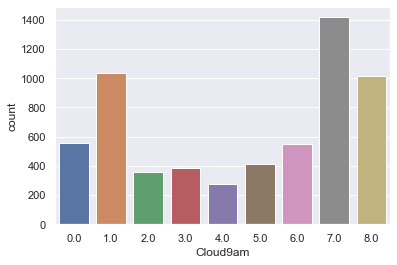

In [41]:
sns.countplot('Cloud9am',data=df);

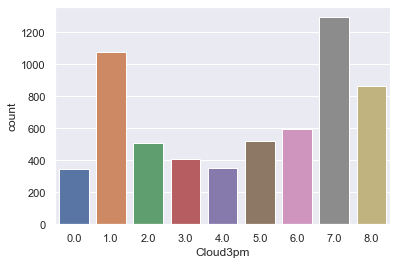

In [42]:
sns.countplot('Cloud3pm',data=df);

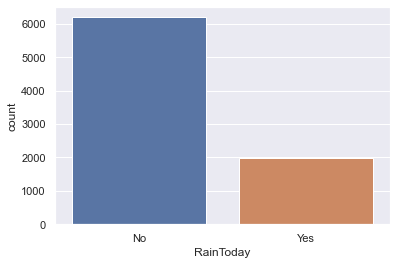

In [43]:
sns.countplot('RainToday',data=df);

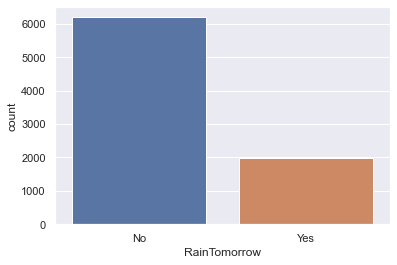

In [44]:
sns.countplot('RainTomorrow',data=df);

In [45]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


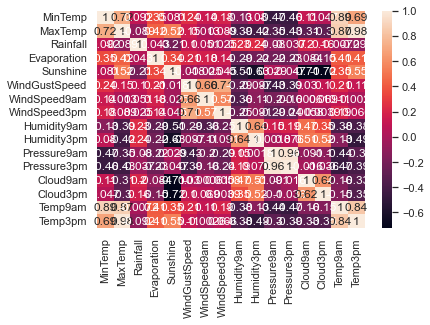

In [46]:
sns.heatmap(df.corr(), annot=True);

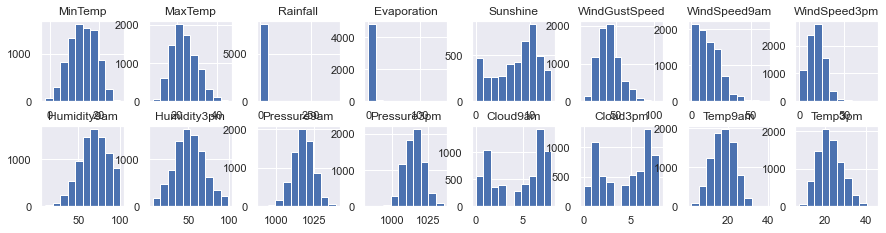

In [48]:
sns.set()
df.hist(figsize=(15,15), layout=(8,8), sharex=False);

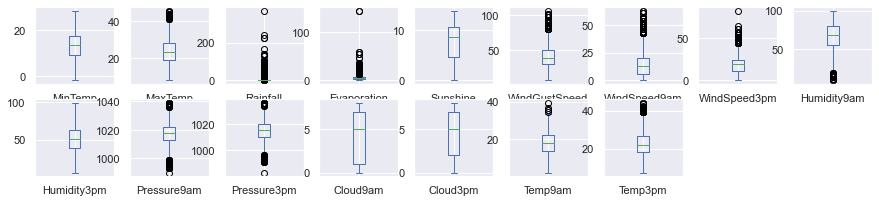

In [50]:
df.plot(kind='box', figsize=(15,15), layout=(9,9), sharex=False, subplots=True);

In [51]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [52]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,149,134,5,116,140,13,20,13,...,60,16,90,103,8,9,145,134,0,0
1,1,1,89,156,0,116,140,14,20,6,...,33,19,119,110,9,9,148,159,0,0
2,2,1,144,162,0,116,140,15,21,13,...,27,24,89,119,9,2,186,148,0,0
3,3,1,107,185,0,116,140,4,9,9,...,34,10,189,160,9,9,157,181,0,0
4,4,1,190,228,8,116,140,13,18,1,...,71,27,121,92,7,8,154,213,0,0
5,5,1,161,202,2,116,140,14,26,13,...,44,17,105,86,9,9,182,205,0,0
6,6,1,158,155,0,116,140,13,23,12,...,38,13,109,114,1,9,157,162,0,0
7,7,1,92,172,0,116,140,13,15,10,...,37,13,147,133,9,9,139,171,0,0
8,8,1,112,224,0,116,140,6,39,9,...,31,3,102,68,9,9,159,218,0,1
9,9,1,146,206,10,116,140,13,11,8,...,47,21,83,89,9,9,177,198,1,0


In [59]:
x = df1.drop(['RainTomorrow','RainToday'], axis=1)
y = df1['RainTomorrow']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(lr.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(lr.score(x_test, y_test)))

accuracy on training data: 0.80
Accuracy on test data: 0.80


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

model1 = rf.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(rf.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(rf.score(x_test, y_test)))

accuracy on training data: 1.00
Accuracy on test data: 0.90


In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

model2 = dt.fit(x_train, y_train)
prediction2 = model2.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(dt.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(dt.score(x_test, y_test)))

accuracy on training data: 1.00
Accuracy on test data: 0.84


In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
print(confusion_matrix(y_test,prediction1))

[[1214   42    0]
 [ 118  264    2]
 [   8    2   35]]


In [66]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1256
           1       0.86      0.69      0.76       384
           2       0.95      0.78      0.85        45

    accuracy                           0.90      1685
   macro avg       0.90      0.81      0.85      1685
weighted avg       0.90      0.90      0.89      1685

